In [4]:
from functions import (load_pickles, extract_joints, plot_joints_trajectory, 
                       get_step_metrics, get_asymmetry, process_biometrics_df)

In [6]:
#load all pickle files
model_outputs = load_pickles()

tracklets_dict = {}

excluded = ['demo_abnormal-circumduction_gait-frontback']
for video_name, video_results in model_outputs.items():
    print('Current video: ', video_name)
    if video_name not in excluded:
        tracklets_dict[video_name] = extract_joints(video_results)

Current video:  demo_abnormal-limping1-front_multiple
Current video:  demo_normal-DTU1-front
Current video:  demo_normal-jake-side
Current video:  demo_normal-guy-side
Current video:  demo_normal-karolina-frontback
Current video:  demo_abnormal-hemiplegic_gait4-front
Current video:  demo_normal-athletic_male-front
Current video:  demo_normal-london_man-back
Current video:  demo_abnormal-limping_11-front_multiple
Current video:  demo_normal-gosia-back
Current video:  demo_abnormal-hemiplegic_gait3-front
Current video:  demo_normal-athletic_male-side
Current video:  demo_normal-gosia-side
Current video:  demo_abnormal-circumduction_gait-frontback
Current video:  demo_normal-angry_girlfriend-front
Current video:  demo_abnormal-antalgic_gait-front_multiple
Current video:  demo_abnormal-hemiplegic_gait-side
Current video:  demo_normal-holly-front
Current video:  demo_normal-happy_man-side
Current video:  demo_normal-london1-back
Current video:  demo_normal-niklas-back
Current video:  demo_a

The structure of detections_dict we have after the above processing is as follows:

```python
    tracklets_dict = {
    
        #dict for each pickle
        'pickle_name' : {       
            #dict for each person
            'person_id' : {
                #dict for each joint
                'joint_name' : {
                    #dict for each dimension
                    'dimension':    List[numpy.float32]     #value for every detected frame
                }
            }
        }
    }
```

In [31]:
# gives the whole trajectory of RAnkle for a second person in demo_Athletic_Male
# tracklets_dict['demo_Athletic_Male'][1]['RAnkle'][0]

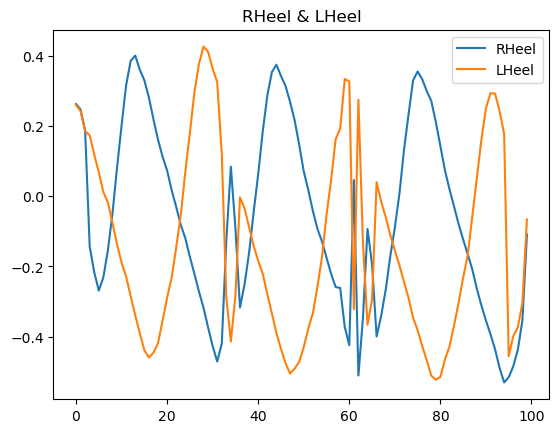

In [7]:
tracklet = tracklets_dict['demo_normal-gosia-side']
person_id = 0
joint_list = ['RHeel', 'LHeel']
dim = 0

plot_joints_trajectory(tracklet, person_id, joint_list, dim)

## Step metrics

In [35]:
steps_length, avg_step_length, speed, time, distance = get_step_metrics(tracklets_dict, 'demo_normal-gosia-side', person_id=0, 
                                                                        dim=0, joint='Heel', smoothing=True, _print=True)

Length of steps: 
[0.32892196 0.63651639 0.38933935 0.32301985 0.72145778]
Average step length: 0.47985106743872163
Speed: 0.02326217281879781
Time (timeframes): 89
Distance: 2.070333380873005


In [36]:
steps_length, avg_step_length, speed, time, distance = get_step_metrics(tracklets_dict, 'demo_Athletic_Male', 
                                                                        person_id=1, dim=0, joint='Heel', smoothing=True, _print=True)

KeyError: 'demo_Athletic_Male'

For now the speed is in meters/timeframes. Needs converting into seconds. I think that every footage is processed in 30fps so this would mean dividing by 30 but we have to make sure.

Below the same footage from a front view. Well, it's shiet.

In [43]:
steps_length, avg_step_length, speed, time, distance = get_step_metrics(tracklets_dict, 'demo_Athletic_Male', person_id=0, 
                                                                        dim=2, joint='Heel', smoothing=False)

Length of steps: 
[0.19652154 0.20736092 0.22899586 0.24945521 0.15296284 0.28207329
 0.27328473 0.27979557]
Average step length: 0.2338062459602952
Speed: 0.017080902293020367
Time (timeframes): 98
Distance: 1.6739284247159958
Assymetry: 0.017069740420224577


In [61]:
steps_length, avg_step_length, speed, time, distance = get_step_metrics(tracklets_dict, 'demo_Athletic_Male', person_id=0, 
                                                                        dim=2, joint='Heel', smoothing=True)

Length of steps: 
[0.19698342 0.22378837 0.24595295 0.26839832 0.28944434 0.28249478
 0.27491244]
Average step length: 0.25456780195236206
Speed: 0.016340115354028354
Time (timeframes): 97
Distance: 1.5849911893407502


Why, you would ask?

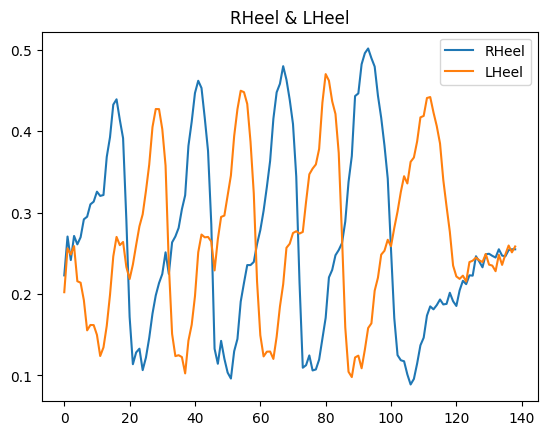

In [59]:
tracklet = tracklets_dict['demo_Athletic_Male']
person_id = 0
joint_list = ['RHeel', 'LHeel']
dim = 2

plot_joints_trajectory(tracklet, person_id, joint_list, dim)

Side-view is the only reasonable angle we can use for step metrics.

Check for girl video as well below.

In [8]:
tracklet = tracklets_dict['demo_girl']
person_id = 0
joint_list = ['RHeel', 'LHeel']
dim = 0

plot_joints_trajectory(tracklet, person_id, joint_list, dim)

KeyError: 'demo_girl'

In [62]:
steps_length, avg_step_length, speed, time, distance = get_step_metrics(tracklets_dict, 'demo_girl', person_id=0, 
                                                                        dim=0, joint='Heel', smoothing=False)

Length of steps: 
[0.64654259 0.7868343  0.7828882  0.76764268 0.74536392]
Average step length: 0.7458543390035629
Speed: 0.04893220795525445
Time (timeframes): 63
Distance: 3.0827291011810303


## Asymmetry

In [66]:
# sideview
asymmetry = get_asymmetry(tracklets_dict, 'demo_Athletic_Male', person_id=1, dim=2, joint='Hip', smoothing=False)

Assymetry: 0.7130486099432177


In [69]:
# frontview
asymmetry = get_asymmetry(tracklets_dict, 'demo_Athletic_Male', person_id=0, dim=0, joint='Hip', smoothing=False)

Assymetry: 0.033056958308696704


## Biometrics dataframe

In [9]:
df = process_biometrics_df(folder='pickles')
df.head(30)

IndexError: list index out of range

In [118]:
df.to_csv("biometrics_data.csv", sep=";", index=False)